       Name   obs_ecc  obs_sinI  calc_ecc  calc_sinI   ast_ecc   ast_sinI  \
0         1  0.117943 -0.139275  0.114946   0.167681  0.115350   0.167737   
1         2  0.287661 -0.155906  0.279271   0.543374  0.280881   0.547176   
2         3  0.235817  0.249061  0.233601   0.229225  0.233766   0.229454   
3         4  0.102952  0.112204  0.098225   0.111997  0.099826   0.111464   
4         5  0.189125 -0.432469  0.186279   0.076430  0.185096   0.079498   
...     ...       ...       ...       ...        ...       ...        ...   
1994  33600  0.126320  0.048541  0.122095   0.108834  4.000000   0.000000   
1995  33630  0.102628  0.149816  0.096873   0.114324  4.000000   0.000000   
1996  33661  0.108461  0.330204  0.102727   0.127577  4.000000   0.000000   
1997  33677  0.117976  0.150319  0.113080   0.114159  4.000000  48.120000   
1998  33684  0.109115  0.083795  0.105454   0.110501  4.000000   0.000000   

      calc_sma  
0     2.763434  
1     2.766876  
2     2.665844  
3     2

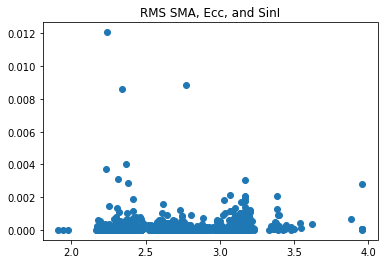

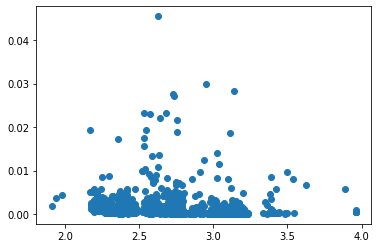

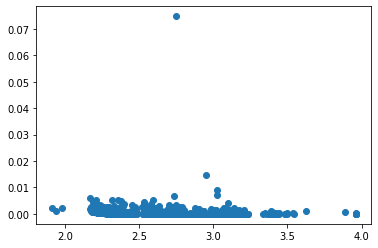

       rms_sma   rms_ecc rms_sinI  rms_sini
0     0.000035  0.000412      NaN  0.000042
1     0.000077  0.001378      NaN  0.002664
2     0.000028  0.000429      NaN  0.000017
3     0.000011  0.000582      NaN  0.000193
4     0.000505  0.023058      NaN  0.002269
...        ...       ...      ...       ...
1994  0.000063  0.000189      NaN  0.000056
1995  0.000008  0.000831      NaN  0.000232
1996  0.000012  0.000526      NaN  0.000320
1997  0.000011  0.000789      NaN  0.000195
1998  0.000008  0.000273      NaN  0.000294

[1999 rows x 4 columns]


In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dfs = []

og_df = pd.read_csv('prop_elem_AstFam_families_new.csv',index_col=0)
print(og_df)
for i in range(9):
    df = pd.read_csv('prop_elem_AstFam_families_'+str(i)+'_'+str(i+2)+'.csv',index_col=0)
    
    if i == 8:
        df1 = pd.read_csv('prop_elem_AstFam_families_'+str(i)+'_'+str(i+2)+'.csv',index_col=0)
    #print(df)
    resid_dfs = pd.DataFrame(columns=['dsma','decc','dsini'])
    resid_dfs['dsma'] = og_df['calc_sma'] - df['calc_sma']
    resid_dfs['decc'] = og_df['calc_ecc'] - df['calc_ecc']
    resid_dfs['dsini'] = og_df['calc_sinI'] - df['calc_sinI']
    dfs.append(resid_dfs)

    
rms = pd.DataFrame(columns=['rms_sma','rms_ecc','rms_sinI'])
sum_sma = 0
sum_ecc = 0
sum_sini = 0
for i in range(9):
    sum_sma = sum_sma + dfs[i]['dsma']**2
    sum_ecc = sum_ecc + dfs[i]['decc']**2
    sum_sini = sum_sini + dfs[i]['dsini']**2

rms['rms_sma'] = np.sqrt(sum_sma/9)
rms['rms_ecc'] = np.sqrt(sum_ecc/9)
rms['rms_sini'] = np.sqrt(sum_sini/9)

plt.scatter(og_df['calc_sma'],rms['rms_sma'])
plt.title('RMS SMA, Ecc, and SinI')
plt.show()
plt.scatter(og_df['calc_sma'],rms['rms_ecc'])
plt.show()
plt.scatter(og_df['calc_sma'],rms['rms_sini'])
plt.show()

print(rms)
#ind = np.where(rms['rms_ecc'] > 0.15)[0]
#print(og_df.iloc[ind],print(rms.iloc[ind]))
#print(df1.iloc[ind])

#ind = np.where(rms['rms_sini'] > 0.2)[0]
#print(og_df.iloc[ind],print(rms.iloc[ind]))
#print(df1.iloc[ind])

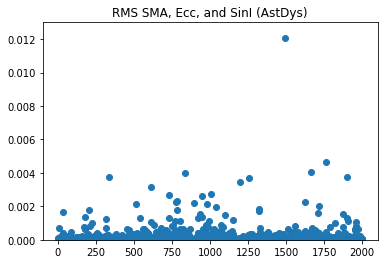

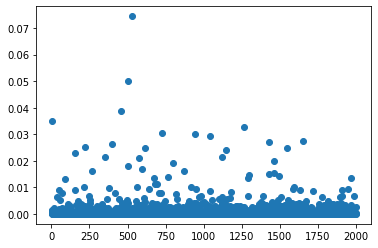

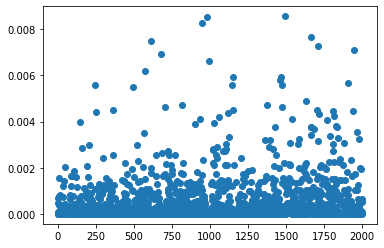

In [114]:
astfam_sig = pd.read_csv('AstFam_sig.txt')
plt.scatter(astfam_sig['Name'],astfam_sig['a(AU)'])
plt.title('RMS SMA, Ecc, and SinI (AstDys)')
plt.ylim(0,0.013)
plt.show()
plt.scatter(astfam_sig['Name'],astfam_sig['e'])
plt.show()
plt.scatter(astfam_sig['Name'],astfam_sig['sinI'])
plt.show()

In [115]:
print(np.median(rms['rms_sma']),np.median(rms['rms_ecc']),np.median(rms['rms_sini']))
print(np.median(astfam_sig['a(AU)']),np.median(astfam_sig['e']),np.median(astfam_sig['sinI']))

2.1007422492533513e-05 0.0006025810223790114 0.00014620399226711672
6.6e-06 0.00021690000000000001 8.510000000000001e-05


In [42]:
print(np.mean(rms['rms_sma']),np.mean(rms['rms_ecc']),np.mean(rms['rms_sini']))
print(np.mean(astfam_sig['a(AU)']),np.mean(astfam_sig['e']),np.mean(astfam_sig['sinI']))

print(len(rms),len(astfam_sig))

0.00011355088697347155 0.02193906193305358 0.01907212258825798
0.0001612009906152242 0.001194494786235662 0.00047746955161626694
1999 1918


In [100]:
ind = np.where(rms['rms_ecc'] > 0.15)[0]
print(len(ind))
print(df1.iloc[ind])

5
     Name   obs_ecc  obs_sinI  calc_ecc  calc_sinI   ast_ecc  ast_sinI  \
52     53  0.192589 -0.439483  0.190236   0.080128  0.219447  0.080099   
214   216  0.230671  0.097552  0.227653   0.220756  0.225966  0.220981   
413   419  0.271659 -0.434257  0.269085   0.080437  0.262008  0.081069   
858   873  0.193302 -0.408833  0.190922   0.085238  0.194571  0.085016   
951   970  0.241413  0.113921  0.238264   0.111515  1.003220  0.110997   

     calc_sma  
52   2.615322  
214  2.791070  
413  2.591342  
858  2.623939  
951  2.557847  


In [116]:
ind = np.where(rms['rms_sini'] > 0.05)[0]
print(len(ind))
print(df1.iloc[ind])
print(rms.iloc[ind])
print(og_df.iloc[ind])

1
    Name   obs_ecc  obs_sinI  calc_ecc  calc_sinI   ast_ecc  ast_sinI  \
70    71  0.171613 -0.098146  0.169857   0.413618  0.164148  0.419481   

    calc_sma  
70  2.751501  
     rms_sma   rms_ecc rms_sinI  rms_sini
70  0.000026  0.007283      NaN  0.074767
    Name   obs_ecc  obs_sinI  calc_ecc  calc_sinI   ast_ecc  ast_sinI  \
70    71  0.164872 -0.100075  0.163347   0.406398  0.164148  0.419481   

    calc_sma  
70  2.751468  


      Name   obs_ecc  obs_sinI  calc_ecc  calc_sinI   ast_ecc  ast_sinI  \
0        1  0.117943 -0.139275  0.114946   0.167681  0.115350  0.167737   
1        2  0.287661 -0.155906  0.279271   0.543374  0.280881  0.547176   
2        3  0.235817  0.249061  0.233601   0.229225  0.233766  0.229454   
3        4  0.102952  0.112204  0.098225   0.111997  0.099826  0.111464   
4        5  0.189125 -0.432469  0.186279   0.076430  0.185096  0.079498   
...    ...       ...       ...       ...        ...       ...       ...   
1006  1028  0.112198  0.375894  0.108369   0.144611  0.108789  0.145739   
1007  1029  0.067652  0.237809  0.062555   0.039505  0.062635  0.038992   
1008  1030  0.163868  0.390741  0.162071   0.248744  0.162283  0.249187   
1009  1031  0.096364 -0.217276  0.093261   0.313375  0.093202  0.313722   
1010  1032  0.153722  0.409045  0.151557   0.141318  0.151927  0.141613   

      calc_sma  
0     2.763434  
1     2.766876  
2     2.665844  
3     2.358399  
4     2.573954

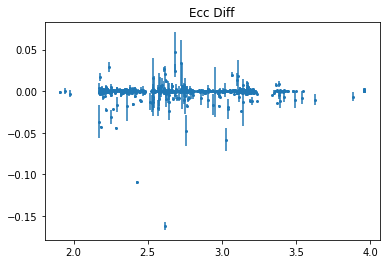

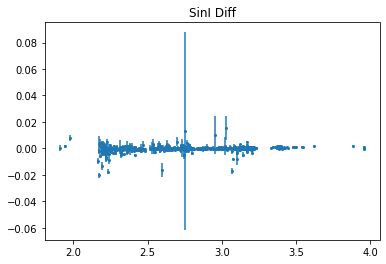

In [138]:
print(og_df.iloc[:1011])

astfam = pd.read_csv('AstFam_data.csv')
astdys = pd.read_csv('Asteroids_data.csv')

compare = og_df.iloc[:1011]

ind = np.where(compare['ast_ecc'] < 0.8)[0]

compare = compare.iloc[ind]
astfam = astfam.iloc[ind]
astdys = astdys.iloc[ind]

plt.scatter(compare['calc_sma'],compare['ast_ecc']-compare['calc_ecc'],s=4)
plt.errorbar(compare['calc_sma'],compare['ast_ecc']-compare['calc_ecc'], yerr=rms['rms_ecc'].iloc[ind], xerr=None,fmt='none')
plt.title('Ecc Diff')
#plt.ylim(-0.02,0.02)
plt.show()

plt.scatter(compare['calc_sma'],compare['ast_sinI']-compare['calc_sinI'],s=4)
plt.errorbar(compare['calc_sma'],compare['ast_sinI']-compare['calc_sinI'], yerr=rms['rms_sini'].iloc[ind], xerr=None,fmt='none')

plt.title('SinI Diff')
plt.show()


In [137]:
print(rms)

       rms_sma   rms_ecc rms_sinI  rms_sini
0     0.000035  0.000412      NaN  0.000042
1     0.000077  0.001378      NaN  0.002664
2     0.000028  0.000429      NaN  0.000017
3     0.000011  0.000582      NaN  0.000193
4     0.000505  0.023058      NaN  0.002269
...        ...       ...      ...       ...
1994  0.000063  0.000189      NaN  0.000056
1995  0.000008  0.000831      NaN  0.000232
1996  0.000012  0.000526      NaN  0.000320
1997  0.000011  0.000789      NaN  0.000195
1998  0.000008  0.000273      NaN  0.000294

[1999 rows x 4 columns]
